In [1]:
import pandas as pd
import numpy as np

In [2]:
data16 = pd.read_csv("clean_tweets_2016.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data20 = pd.read_csv("clean_tweets_2020.csv")

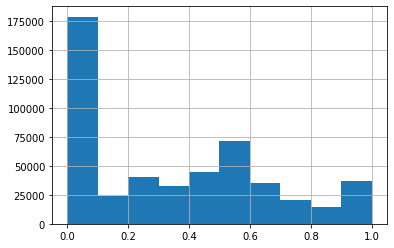

In [13]:
data20['textSubjectivity'].hist()

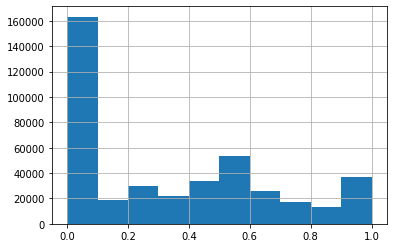

In [14]:
data16['textSubjectivity'].hist()

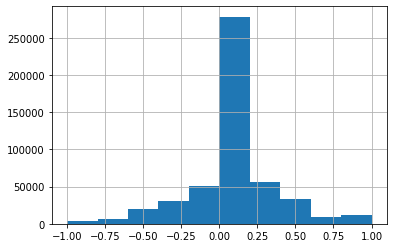

In [15]:
data20['textPolarity'].hist()

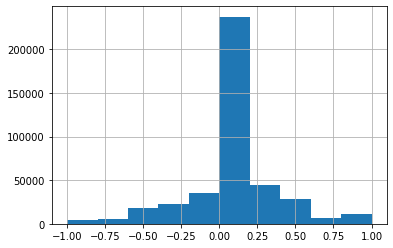

In [16]:
data16['textPolarity'].hist()

In [45]:
data20['textSubjectivity'].describe()

count    500000.000000
mean     0.339926     
std      0.317853     
min      0.000000     
25%      0.000000     
50%      0.325000     
75%      0.561905     
max      1.000000     
Name: textSubjectivity, dtype: float64

In [46]:
data16['textSubjectivity'].describe()

count    414173.000000
mean     0.333088     
std      0.332413     
min      0.000000     
25%      0.000000     
50%      0.300000     
75%      0.575000     
max      1.000000     
Name: textSubjectivity, dtype: float64

In [47]:
data20['textPolarity'].describe()

count    500000.000000
mean     0.055675     
std      0.291581     
min     -1.000000     
25%      0.000000     
50%      0.000000     
75%      0.178571     
max      1.000000     
Name: textPolarity, dtype: float64

In [48]:
data16['textPolarity'].describe()

count    414173.000000
mean     0.053853     
std      0.299373     
min     -1.000000     
25%      0.000000     
50%      0.000000     
75%      0.175000     
max      1.000000     
Name: textPolarity, dtype: float64

In [51]:
import re
import collections
hashtag = []
for x in data16['full_text']:
    tags = [i[1:] for i in x.split() if i.startswith("#")]
    for tag in tags:
        hashtag.append(tag)
counts = collections.Counter(hashtag)
data_16_most_common_hashtags = counts.most_common(50)

In [59]:
hashtags_2016= pd.DataFrame(data_16_most_common_hashtags, columns=['hashtags', 'counts'])

In [76]:
import matplotlib.pyplot as plt

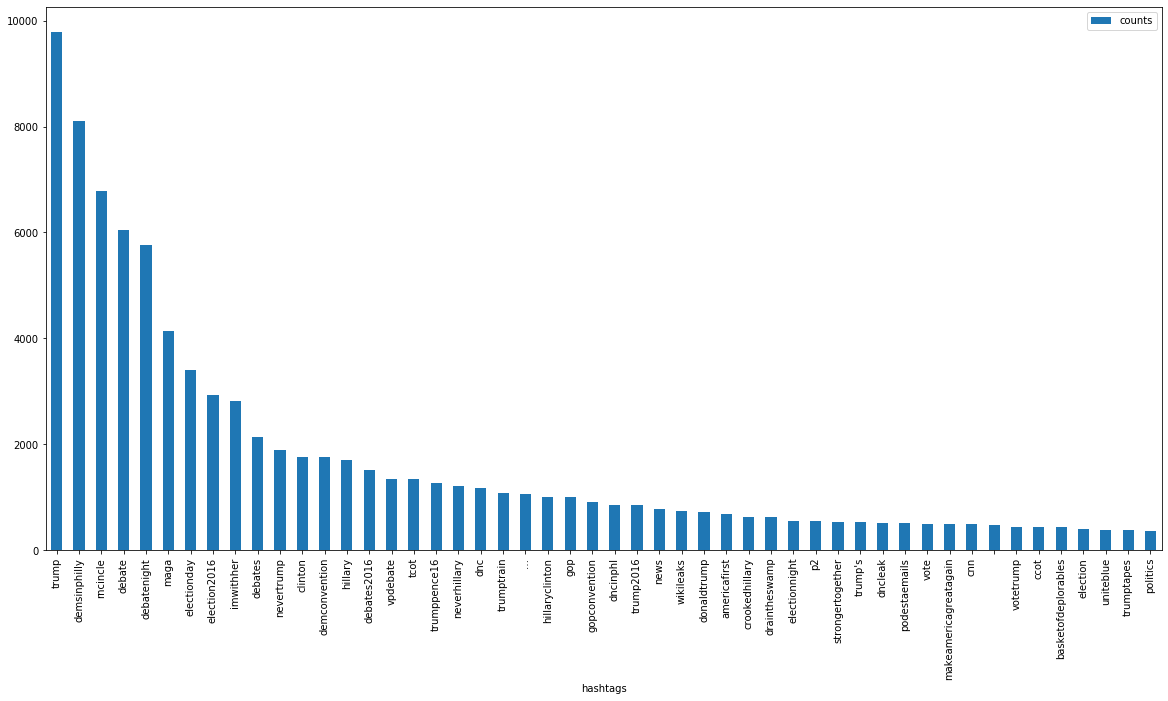

In [92]:
hashtags_2016.plot(kind='bar',x='hashtags',y='counts', figsize=(20,10))

In [93]:
hashtag = []
for x in data20['full_text']:
    tags = [i[1:] for i in x.split() if i.startswith("#")]
    for tag in tags:
        hashtag.append(tag)
counts = collections.Counter(hashtag)
data_20_most_common_hashtags = counts.most_common(50)

In [95]:
hashtags_2020= pd.DataFrame(data_20_most_common_hashtags, columns=['hashtags', 'counts'])

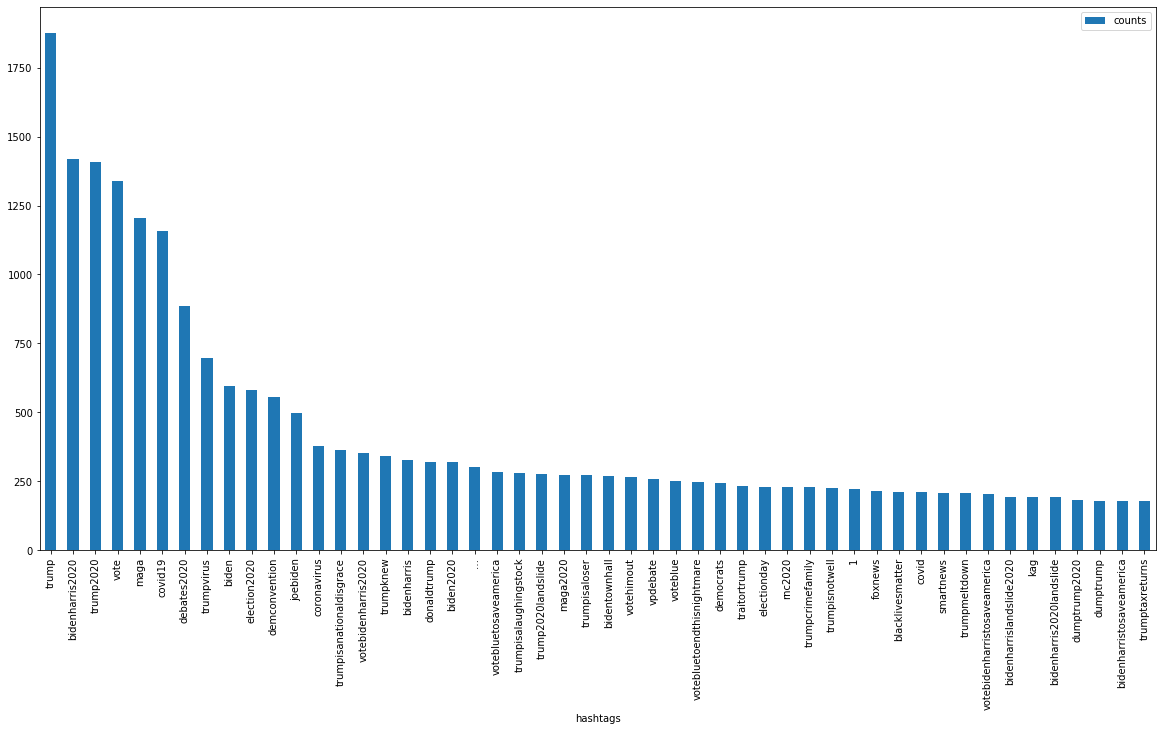

In [97]:
hashtags_2020.plot(kind='bar',x='hashtags',y='counts', figsize=(20,10))

In [104]:
def hashcounts16(val):
    return val/data16.shape[0]

def hashcounts20(val):
    return val/data20.shape[0]

#### The new column baseline contains the baseline occurrence for each tweet in the dataset. It is found by dividing the number of occurences of the hashtag by the total number of tweets in our dataset.

In [105]:
hashtags_2016['baseline'] = hashtags_2016['counts'].apply(hashcounts16)
hashtags_2016.head()

,hashtags,counts,baseline
0,trump,9777,0.023606
1,demsinphilly,8103,0.019564
2,rncincle,6791,0.016397
3,debate,6048,0.014603
4,debatenight,5769,0.013929


In [111]:
hashtags_2020['baseline'] = hashtags_2020['counts'].apply(hashcounts20)
hashtags_2020.head()

,hashtags,counts,baseline
0,trump,1877,0.003754
1,bidenharris2020,1418,0.002836
2,trump2020,1408,0.002816
3,vote,1339,0.002678
4,maga,1205,0.002410


#### A histogram showing the distribution of number of posts per user.

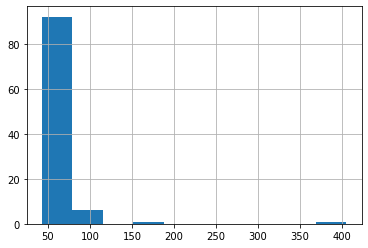

In [106]:
#2016
vals = data16['screen_name'].value_counts().sort_values(ascending=False)
vals[:100].hist()

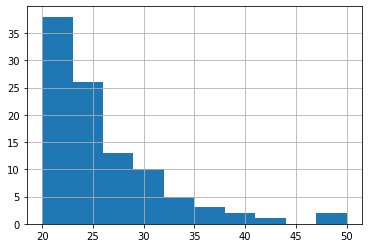

In [112]:
#2020
vals = data20['screen_name'].value_counts().sort_values(ascending=False)
vals[:100].hist()

#### histogram showing distibution of number of retweets per user

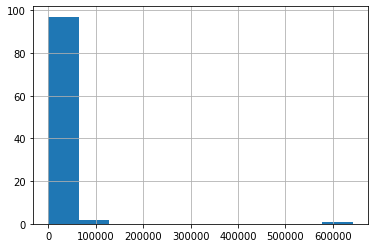

In [110]:
#2016
rt_16 = data16.groupby(['screen_name'])['retweet_count'].sum()
rt_16[:100].hist()

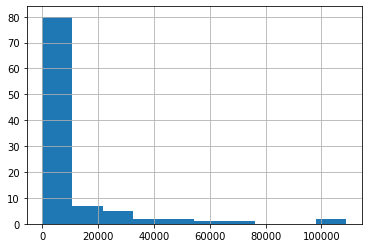

In [113]:
#2020
rt_16 = data20.groupby(['screen_name'])['retweet_count'].sum()
rt_16[:100].hist()